<a href="https://colab.research.google.com/github/Frey87/Google-Courses/blob/main/Course_2_TikTok_project_lab_google_advanced_data_analytics_professional_certificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data dictionary**
> This project uses a dataset called tiktok_dataset.csv. It contains synthetic data created for this project in partnership with TikTok. The dataset contains:
**19,383** rows – Each row represents a different published TikTok video in which a claim/opinion has been made.
**12** columns


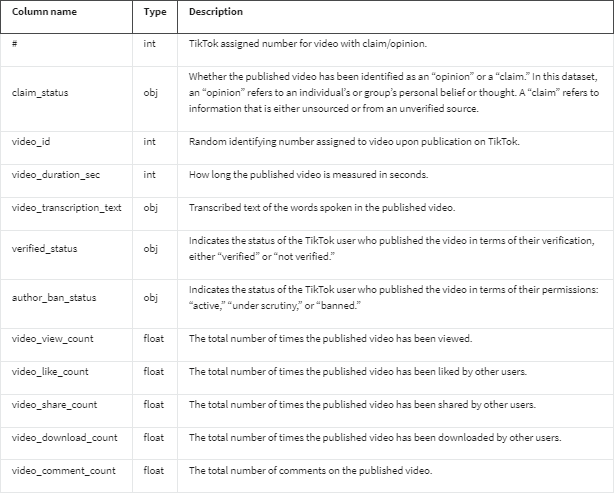

> **Task 2a. Imports and data loading**

In [ ]:
# Import packages
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tiktok_dataset.csv")

> **Task 2b. Understand the data - Inspect the data**

In [ ]:
# Display and examine the first 10 rows of the dataframe
data.head(10)

In [ ]:
# Get summary info
data.info()

In [ ]:
# Get summary statistics
data.describe()

**Response**

Question 1: In any case, it's numeric data only columns claim_status and video_transciption_text are str but for future flexibility, it will be better to change the values of column claim_status to 0 and 1, for example.

Question 2: After observing we can mention that this dataset has dtypes: float64(5), int64(3), object(4) without null values, and as was mentioned only 2 columns have non-numeric values.

Question 3: I suppose that it could be a normal distribution but we need to make additional calculations to approve it. No, we need to dive deeper to understand the nature of this data but I can say that differences between the whole amount of records 19382 and other columns except video_id and video_duration_sec are lower. Yes it seems that here we could find outliers

> **Task 2c. Understand the data - Investigate the variables**

In [ ]:
# What are the different values for claim status and how many of each are in the data?
data['claim_status'].value_counts()

In [ ]:
# What is the average view count of videos with "claim" status?
claims = data[data['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

In [ ]:
# What is the average view count of videos with "opinion" status?
opinions = data[data['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

In [ ]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

In [ ]:
# Calculate the median video share count of each author ban status
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

In [ ]:
# What's the median video share count of each author ban status?
data.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]

In [ ]:
#Use groupby() to group the data by author_ban_status, then use agg() to get the count, mean, and median of each of the following columns
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

In [ ]:
# Create a likes_per_view column
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create a comments_per_view column
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create a shares_per_view column
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

In [ ]:
#Use groupby() to compile the information in each of the three newly created columns for each combination of categories of claim status and author ban status, then use agg() to calculate the count, the mean, and the median of each group.
data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

> **Conclusion**
- 50% are claims—9,608 of the 19,382 samples;
- engagement level correlated with claim status;
- videos with banned authors are correlated with a video's engagement level.

